In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np

load_dotenv()
TRAIN_SET = os.getenv("TRAIN_PATH")
TEST_SET  = os.getenv("TEST_PATH")

train = pd.read_csv(TRAIN_SET)
test = pd.read_csv(TEST_SET) 

train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pulizia dei dati: il test set presenta 59 colonne. Il train set ne presenta 82. Rimuovo le colonne in eccesso 

In [2]:
test_features_serie = pd.Series(test.columns)
print(test_features_serie)

0                                         id
1                  Basic_Demos-Enroll_Season
2                            Basic_Demos-Age
3                            Basic_Demos-Sex
4                                CGAS-Season
5                            CGAS-CGAS_Score
6                            Physical-Season
7                               Physical-BMI
8                            Physical-Height
9                            Physical-Weight
10              Physical-Waist_Circumference
11                     Physical-Diastolic_BP
12                        Physical-HeartRate
13                      Physical-Systolic_BP
14                  Fitness_Endurance-Season
15               Fitness_Endurance-Max_Stage
16               Fitness_Endurance-Time_Mins
17                Fitness_Endurance-Time_Sec
18                                FGC-Season
19                                FGC-FGC_CU
20                           FGC-FGC_CU_Zone
21                              FGC-FGC_GSND
22        

In [3]:
smaller_train = train[train.columns.intersection(test.columns)]
#print(smaller_train.columns)

# Crea una lista per memorizzare le righe
rows = []

# Per ogni feature nelle colonne comuni tra train e test
for feature in smaller_train.columns:
    # Calcola la percentuale di valori non nulli nel train e nel test
    train_not_null = 100 * smaller_train[feature].notnull().sum() / len(smaller_train)
    test_not_null = 100 * test[feature].notnull().sum() / len(test)
    
    # Aggiungi il risultato alla lista
    rows.append({'feature': feature, 'train': train_not_null, 'test': test_not_null})

# Converti la lista in un DataFrame
features = pd.DataFrame(rows)
features.sort_values('train', ascending=False, inplace=True)

# Stampa il risultato
print(features)



                                   feature       train   test
0                                       id  100.000000  100.0
1                Basic_Demos-Enroll_Season  100.000000  100.0
2                          Basic_Demos-Age  100.000000  100.0
3                          Basic_Demos-Sex  100.000000  100.0
57                     PreInt_EduHx-Season   89.393939   90.0
18                              FGC-Season   84.494949   85.0
6                          Physical-Season   83.585859   70.0
58  PreInt_EduHx-computerinternet_hoursday   83.358586   80.0
9                          Physical-Weight   77.676768   65.0
8                          Physical-Height   76.439394   65.0
7                             Physical-BMI   76.313131   65.0
12                      Physical-HeartRate   74.924242   60.0
13                    Physical-Systolic_BP   74.595960   55.0
11                   Physical-Diastolic_BP   74.595960   55.0
54                              SDS-Season   66.111111   50.0
55      

## Capiamo come sono fatti i dati
### Non è necessario rendere una pd.Serie le labels del test set. Con la riga sopra eseguita lo fa automaticamente
nella tabella implementata vediamo la percentuale di valori non nulli per ogni feature del dataset sia per il train e per il set: se decidessimo di scartare tutte le colonne che contengono almeno un valore non nullo alleneremo il nostro dataset su 4 features, se decidessimo di allenare il dataset sul 60% dei dati possiamo allenare il nostro modello su 12 features (scartando i dati nulli e le colonne con una percentuale di valori not null non sufficiente)  
sarebbe carino sperimentare il modello su diversi tipi di dati.
Si tenga conto che il test ha solamente 20 istanze quindi avere il 40% di dati not null in una variabile vuoldire avere solamente 8 istanze di test 

In [4]:
smaller_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

# TO DO:
- Decodificare le Feature Categoriche con 1HE --> DONE
- Rimpiazzare valori NULL con bootstrap sampling dei valori presenti
- Rimuovere le features con la minore Feature Importance

Di seguito svolgo il primo punto:  **Decodificare con 1HE**, per eseguire gli step successivi devo avere un modello che può essere allenato

In [5]:
labels_list = smaller_train.columns.tolist()
labels_list


['id',
 'Basic_Demos-Enroll_Season',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-Season',
 'CGAS-CGAS_Score',
 'Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-Season',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-Season',

**Rimuovo valori dal dataset dove è presente arbitraria percentuale di valori NaN**

In [6]:
# Drop the columns with more than a fixed percentage of missing values:
def drop_columns(df, threshold = 0.3): #by default the threshold is 20%. If a column is >= 80% of NaNs, it will be dropped. It can be changed.

    # Calculate the minimum required non-NaN values per column based on the threshold percentage
    minimum_non_NaN = len(df) * threshold   

    # Identify columns to be dropped
    dropped_columns = df.columns[df.isnull().sum() > (len(df) - minimum_non_NaN)].tolist()

    # Drop the identified columns from the DataFrame
    new_df = df.drop(columns=dropped_columns)

    return new_df, dropped_columns

In [7]:
smaller_train_cleaned, dropped_columns = drop_columns(smaller_train)

smaller_train_cleaned.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,39.4497,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,58.9338,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop the id feature
smaller_train_cleaned_id = smaller_train_cleaned.drop('id', axis=1)

In [9]:
smaller_train_cleaned_id.info()
print(dropped_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Diastolic_BP                   2954 non-null   float64
 10  Physical-HeartRate                      2967 non-null   floa

In [10]:
numerical_features = smaller_train_cleaned_id.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = smaller_train_cleaned_id.select_dtypes(include=[object]).columns.tolist()

print(f"Numerical features are", len(numerical_features), "; -> ", numerical_features)
print("Cathegorical features are: ", len(categorical_features), "; -> ", categorical_features)


Numerical features are 39 ; ->  ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
Cathegorical features are:  9 ; ->  ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']


In [11]:
#convert all the numerical features to float64
#smaller_train_cleaned[numerical_features] = smaller_train_cleaned[numerical_features].astype(np.float64)
#smaller_train_cleaned.info()

Negli ultimi passaggi ho rimosso le feature con una soglia arbitraria di valori NaN e la feature _id_. Ho inoltre suddiviso le feature categoriche rispetto alle numeriche. Converto quindi ora le feature categoriche con 1HE

In [12]:
#convert all the categorical features to numerical
smaller_train_cleaned_1he = pd.get_dummies(smaller_train_cleaned_id, columns=categorical_features) #get_dummies is a function that 
                                                                                            #converts categorical variables into dummy/indicator variables
smaller_train_cleaned_1he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   FGC-FGC_CU                              2322 non-null   float64
 10  FGC-FGC_CU_Zone                         2282 non-null   floa

In [13]:
smaller_train_cleaned_1he.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,...,False,False,False,False,False,False,True,False,False,False
1,9,0,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,...,False,False,True,False,False,False,False,False,True,False
2,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,...,True,False,True,False,False,False,False,False,True,False
3,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,False,True,False,False,True,False,False,False,False,True
4,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


Ci sono quindi 39 feature numeriche e le categoriche descrivono solo le stagioni. Sono state espanse a quattro colonne per feature (una per stagione) e rappresentate da un valore booleano. Le converto ora con: 
 - false -> 0
 - true  -> 1 

Così da mantenerle come colonne sparse

In [14]:
#convert the boolean features to numerical (True = 1, False = 0)
smaller_train_cleaned_1he = smaller_train_cleaned_1he * 1
smaller_train_cleaned_1he = smaller_train_cleaned_1he.astype(np.float64)
smaller_train_cleaned_1he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   float64
 1   Basic_Demos-Sex                         3960 non-null   float64
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   FGC-FGC_CU                              2322 non-null   float64
 10  FGC-FGC_CU_Zone                         2282 non-null   floa

Tramite bootstrap sampling sostituisco i valori NaN con valori verosimili

In [15]:
#replace NaN values with bootstrapping
smaller_train_cleaned_1he_filled = smaller_train_cleaned_1he.fillna(smaller_train_cleaned_1he.mean())
smaller_train_cleaned_1he_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   float64
 1   Basic_Demos-Sex                         3960 non-null   float64
 2   CGAS-CGAS_Score                         3960 non-null   float64
 3   Physical-BMI                            3960 non-null   float64
 4   Physical-Height                         3960 non-null   float64
 5   Physical-Weight                         3960 non-null   float64
 6   Physical-Diastolic_BP                   3960 non-null   float64
 7   Physical-HeartRate                      3960 non-null   float64
 8   Physical-Systolic_BP                    3960 non-null   float64
 9   FGC-FGC_CU                              3960 non-null   float64
 10  FGC-FGC_CU_Zone                         3960 non-null   floa

In [16]:
#create a new empty column as a target
smaller_train_cleaned_1he_filled['target'] = np.nan
smaller_train_cleaned_1he_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   float64
 1   Basic_Demos-Sex                         3960 non-null   float64
 2   CGAS-CGAS_Score                         3960 non-null   float64
 3   Physical-BMI                            3960 non-null   float64
 4   Physical-Height                         3960 non-null   float64
 5   Physical-Weight                         3960 non-null   float64
 6   Physical-Diastolic_BP                   3960 non-null   float64
 7   Physical-HeartRate                      3960 non-null   float64
 8   Physical-Systolic_BP                    3960 non-null   float64
 9   FGC-FGC_CU                              3960 non-null   float64
 10  FGC-FGC_CU_Zone                         3960 non-null   floa

In [17]:
test.head() 

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train_sii_filled = train['sii'].fillna(train['sii'].mean())

(array([1594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1224.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  730.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  378.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          34.]),
 array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
        0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
        0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87

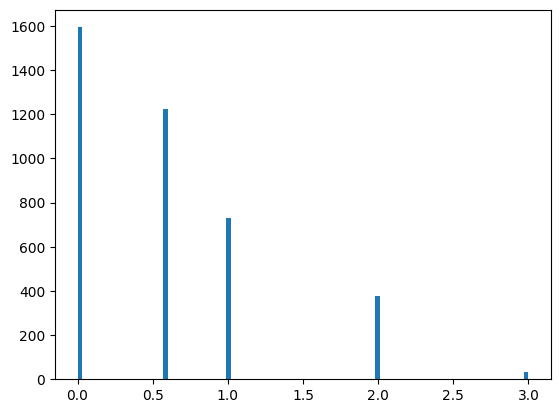

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.hist(train_sii_filled, bins=100)

(array([1594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  730.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  378.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          34.]),
 array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
        0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
        0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87

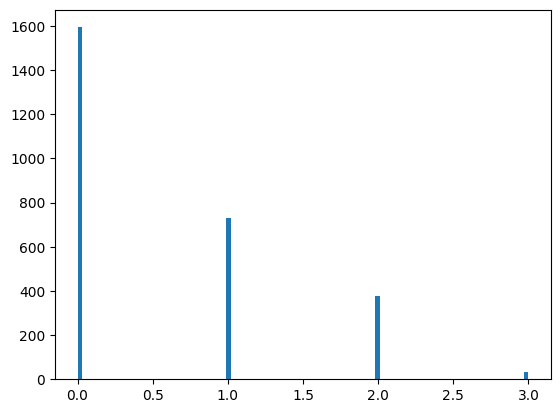

In [33]:
plt.hist(train['sii'], bins=100)